### 1.載入套件

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2.載入Fashion資料

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 3.初步認識資料

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Sandal


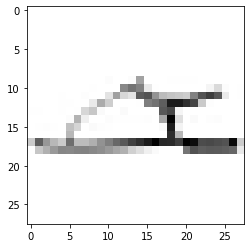

In [5]:
n = 2345
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

### 4.資料前處理

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train.reshape(60000,28,28,1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [10]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [11]:
x_train[50].shape

(28, 28, 1)

In [12]:
y_train[10]

0

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train,10)

In [15]:
y_test = to_categorical(y_test,10)

### 5.建立第一個CNN模型 (loss function為MSE)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.optimizers import SGD

In [59]:
# 三層的filter分別為:32、64、128

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(304, activation='relu'))

In [26]:
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [29]:
model.compile(loss='mse',optimizer=SGD(lr=0.08),metrics=["accuracy"])

In [30]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 705us/sample - loss: 0.0893 - accuracy: 0.2876
Epoch 2/20
60000/60000 [==============================] - 45s 757us/sample - loss: 0.0829 - accuracy: 0.4047
Epoch 3/20
60000/60000 [==============================] - 45s 755us/sample - loss: 0.0471 - accuracy: 0.6628
Epoch 4/20
60000/60000 [==============================] - 45s 748us/sample - loss: 0.0380 - accuracy: 0.7264
Epoch 5/20
60000/60000 [==============================] - 45s 755us/sample - loss: 0.0341 - accuracy: 0.7576
Epoch 6/20
60000/60000 [==============================] - 45s 758us/sample - loss: 0.0316 - accuracy: 0.7777
Epoch 7/20
60000/60000 [==============================] - 45s 751us/sample - loss: 0.0298 - accuracy: 0.7929
Epoch 8/20
60000/60000 [==============================] - 46s 760us/sample - loss: 0.0284 - accuracy: 0.8020
Epoch 9/20
60000/60000 [==============================] - 45s 753us/sample - loss: 0.0272 - accuracy: 0.8

### 訓練結果

In [31]:
result = model.predict_classes(x_test)

In [32]:
def my_predict(n):
    print('我的CNN預測是',class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [33]:
from ipywidgets import interact_manual

In [34]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [35]:
score = model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
loss , accuracy = score

In [37]:
print("測試資料的正確率為", accuracy)

測試資料的正確率為 0.8563


#### 我好奇在其他條件一樣的情況下，使用不同的loss function會不會對訓練準確度有差異，因此選擇了Cross Entropy這個損失函數來做對比。
#### (Cross Entropy是一個適用於分類情形的損失函數)

### 6.建立第二個CNN模型 (loss function為Cross Entropy)

In [38]:
model2 = Sequential()

In [39]:
model2.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

In [40]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))

In [42]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
model2.add(Conv2D(128,(3,3),padding='same',activation='relu'))

In [44]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [45]:
model2.add(Flatten())

In [46]:
model2.add(Dense(304, activation='relu'))

In [47]:
model2.add(Dense(10,activation='softmax'))

In [48]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [50]:
model2.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.08),metrics=["accuracy"])

In [51]:
model2.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 706us/sample - loss: 0.7832 - accuracy: 0.7090
Epoch 2/20
60000/60000 [==============================] - 47s 789us/sample - loss: 0.4250 - accuracy: 0.8428
Epoch 3/20
60000/60000 [==============================] - 47s 783us/sample - loss: 0.3502 - accuracy: 0.8713
Epoch 4/20
60000/60000 [==============================] - 49s 810us/sample - loss: 0.3168 - accuracy: 0.8834
Epoch 5/20
60000/60000 [==============================] - 47s 783us/sample - loss: 0.2923 - accuracy: 0.8932
Epoch 6/20
60000/60000 [==============================] - 47s 787us/sample - loss: 0.2725 - accuracy: 0.8987
Epoch 7/20
60000/60000 [==============================] - 48s 794us/sample - loss: 0.2559 - accuracy: 0.9057
Epoch 8/20
60000/60000 [==============================] - 49s 810us/sample - loss: 0.2417 - accuracy: 0.9106
Epoch 9/20
60000/60000 [==============================] - 48s 796us/sample - loss: 0.2288 - accuracy: 0.9

### 訓練結果

In [52]:
result2 = model2.predict_classes(x_test)

In [53]:
def my_predict_2(n):
    print('我的CNN預測是',class_names[result2[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [54]:
from ipywidgets import interact_manual

In [55]:
interact_manual(my_predict_2, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict_2(n)>

In [56]:
score2 = model2.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [57]:
loss2 , accuracy2 = score2

In [58]:
print("測試資料的正確率為", accuracy2)

測試資料的正確率為 0.9114


### 7.兩個模型的比較

* 模型假設：

三層的filter分別為32,64,128 

三層的activation都是'relu'

全連結神經網路的部分：

第一層的神經元數量=304, activation='relu'。

第二層的神經元數量=10, activation='softmax'。

batch_size=100, epochs=20, optimizer=SGD(lr=0.08)

* 兩個模型的差異在於使用不同的loss function

model1用的loss function為MSE

model2用的loss function為categorical_crossentropy

* 訓練結果

model1訓練資料的accuracy為：0.8639

model1測試資料的accuracy為：0.8563


model2訓練資料的accuracy為：0.9504

model2測試資料的accuracy為：0.9114

由於model2的accuracy比model1的高，因此我們可以得知，在訓練分類問題的模型時，loss function使用categorical_crossentropy會比用MSE好。

此外，model1使用測試資料的accuracy與使用訓練資料的差異不大；
model2使用測試資料的accuracy與使用訓練資料的差異有4%，但是不構成overfitting的情況。

